In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import sklearn.preprocessing as prep
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

In [19]:
# Read the csv file to create a dataframe.
dm = pd.read_csv(r'data\dmtrain.csv')
dm

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat,response
0,1,2,30.0,20.0,24,1,6,1
1,2,25,207.0,20.0,24,1,6,0
2,3,5,52.0,15.0,24,1,6,0
3,4,11,105.0,15.0,24,1,6,0
4,5,2,32.0,17.0,24,1,6,0
...,...,...,...,...,...,...,...,...
1995,1996,12,105.0,20.0,1,2,6,0
1996,1997,36,786.0,5.0,1,2,6,0
1997,1998,7,415.0,100.0,1,1,7,0
1998,1999,5,77.0,25.0,1,1,7,0


array([[<Axes: title={'center': 'n24'}>,
        <Axes: title={'center': 'rev24'}>],
       [<Axes: title={'center': 'revlast'}>,
        <Axes: title={'center': 'elpsdm'}>],
       [<Axes: title={'center': 'ordfreq'}>,
        <Axes: title={'center': 'ordcat'}>]], dtype=object)

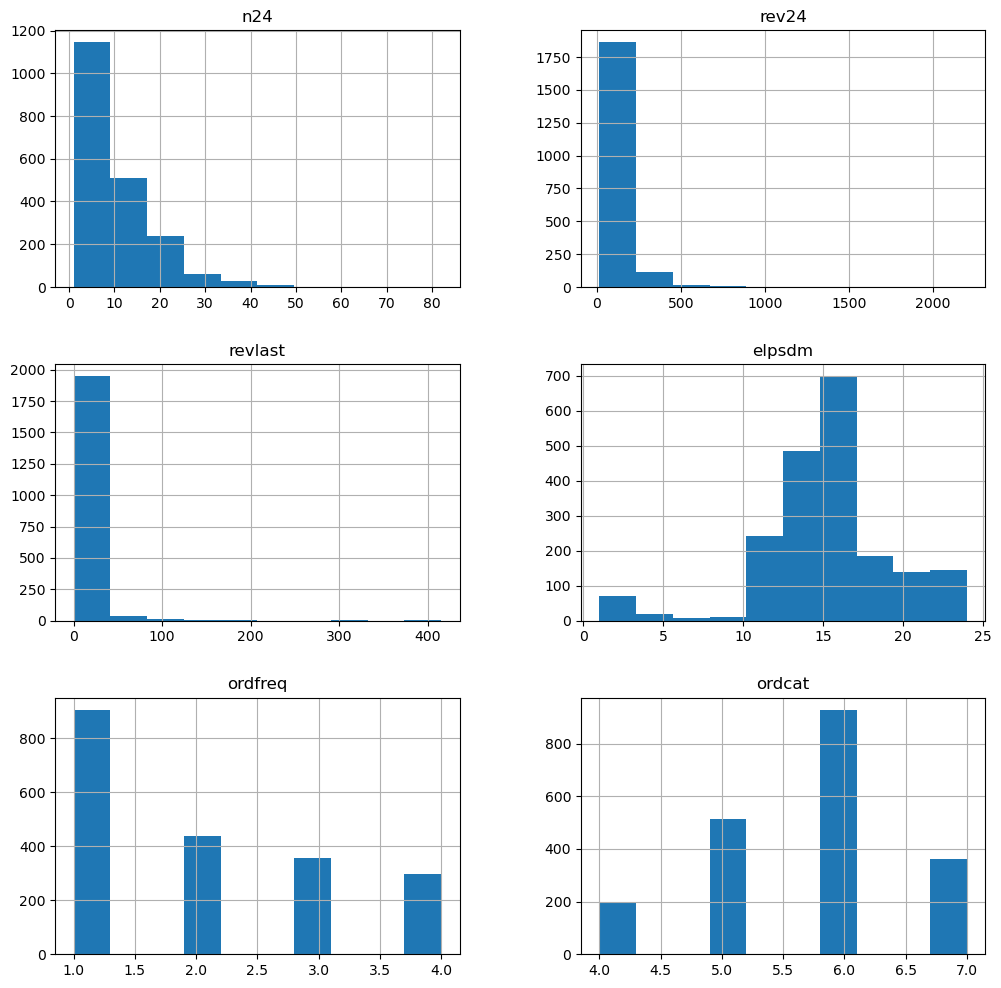

In [20]:
#Plotting histogram for non-binary variables
dm.hist(column = ['n24', 'rev24', 'revlast', 'elpsdm', 'ordfreq', 'ordcat'], bins =10, figsize =(12,12))

In [21]:
# Log transforming on n23, rev24, revlast
dm['log10_n24'] = np.log(dm['n24'])
dm['log10_rev24'] = np.log(dm['rev24'])
dm['log10_revlast'] = np.log(dm['revlast']+0.0000001)


#Printing skewness of each column
dm.skew(axis=0, skipna=True)

id                0.000000
n24               1.935635
rev24             7.221135
revlast          11.968288
elpsdm           -0.774676
ordfreq           0.611939
ordcat           -0.338221
response          0.915611
log10_n24        -0.442413
log10_rev24       0.127623
log10_revlast   -11.313794
dtype: float64

In [22]:
# Drop the four columns 
dm = dm.drop(['n24', 'rev24', 'revlast', 'id'], axis =1)
dm

,elpsdm,ordfreq,ordcat,response,log10_n24,log10_rev24,log10_revlast
0,24,1,6,1,0.693147,3.401197,2.995732
1,24,1,6,0,3.218876,5.332719,2.995732
2,24,1,6,0,1.609438,3.951244,2.708050
3,24,1,6,0,2.397895,4.653960,2.708050
4,24,1,6,0,0.693147,3.465736,2.833213
...,...,...,...,...,...,...,...
1995,1,2,6,0,2.484907,4.653960,2.995732
1996,1,2,6,0,3.583519,6.666957,1.609438
1997,1,1,7,0,1.945910,6.028279,4.605170
1998,1,1,7,0,1.609438,4.343805,3.218876


In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [24]:
# Check if there are any null values
dm.isnull().any()

elpsdm           False
ordfreq          False
ordcat           False
response         False
log10_n24        False
log10_rev24      False
log10_revlast    False
dtype: bool

In [25]:
# Convert the target column into a numpy array
y = dm['response'].to_numpy()
# Copy the dataframe
X = dm.copy()

# Drop the 'response' (target variable) column
X = X.drop(['response'], axis = 1)

In [26]:
# Dataframe containing only the independent variables
X

,elpsdm,ordfreq,ordcat,log10_n24,log10_rev24,log10_revlast
0,24,1,6,0.693147,3.401197,2.995732
1,24,1,6,3.218876,5.332719,2.995732
2,24,1,6,1.609438,3.951244,2.708050
3,24,1,6,2.397895,4.653960,2.708050
4,24,1,6,0.693147,3.465736,2.833213
...,...,...,...,...,...,...
1995,1,2,6,2.484907,4.653960,2.995732
1996,1,2,6,3.583519,6.666957,1.609438
1997,1,1,7,1.945910,6.028279,4.605170
1998,1,1,7,1.609438,4.343805,3.218876


In [27]:
# Create a decision tree classifier
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X, y)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [28]:
# get the depth of the decision tree
dtree.get_depth()

26

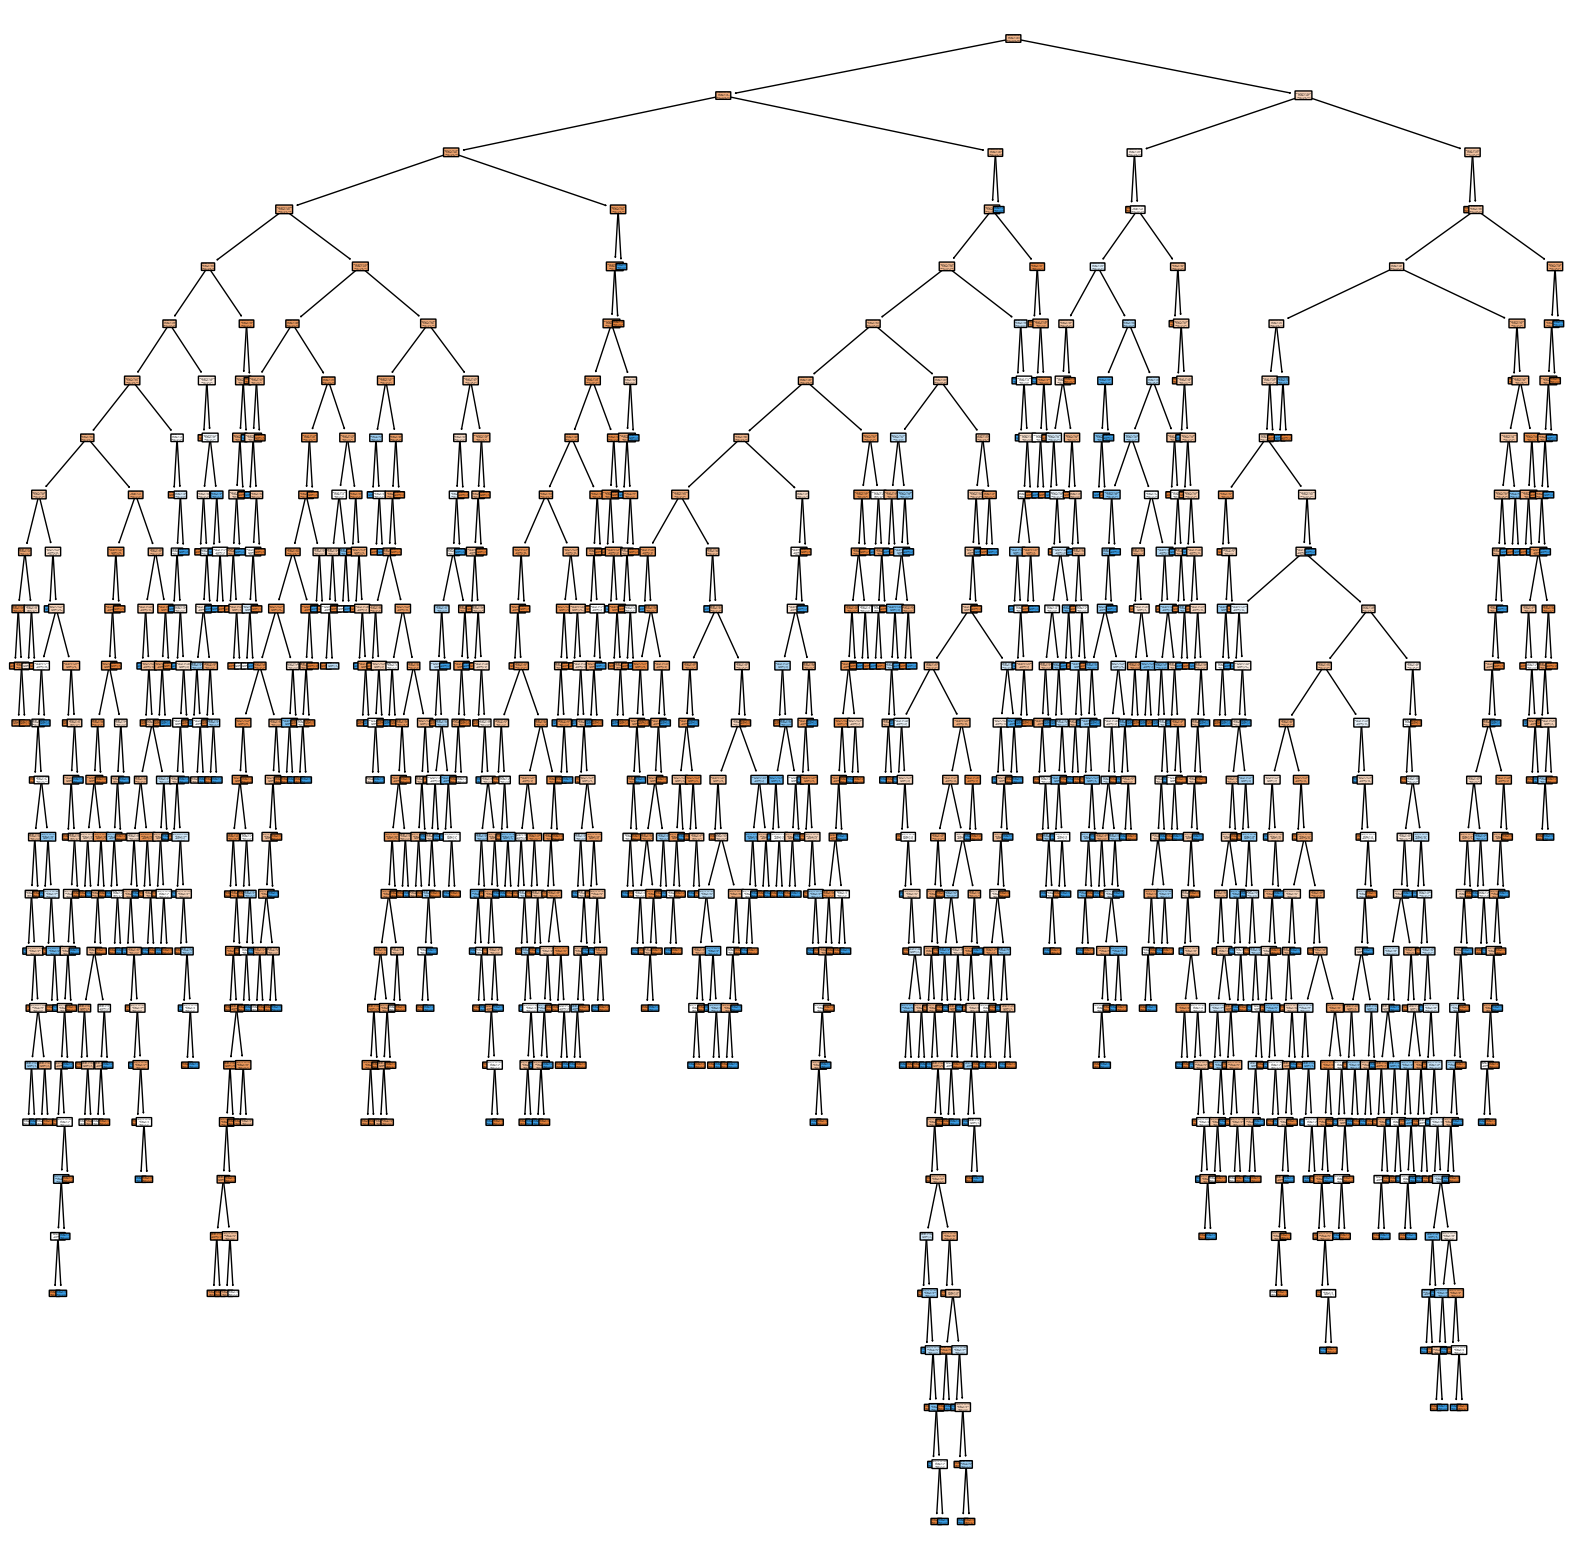

In [29]:
# Plot the decision tree
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = list(dm.columns), class_names = ['Yes','No'],
                     filled = True , rounded = True)

In [30]:
from sklearn.model_selection import KFold, cross_val_score

In [31]:
# Initializing a 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# function for running cross validation
def run_cross_validation_on_trees(X, y, tree_depths,kf, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    # Find the score of decision trees with different depths
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=kf, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores


In [32]:
# fitting trees of depth 1 to 26 (depth of the decsion tree)
sm_tree_depths = range(1,27)

In [33]:
# Running cross validation
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X,y,sm_tree_depths,kf)

In [34]:
# Printing the 3 best trees based on accuracy
for i in range(1,4):
    idx_max = np.argsort(sm_cv_scores_mean)[-i]
    sm_best_tree_depth = sm_tree_depths[idx_max]
    sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
    sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
    print(f'The depth-{sm_best_tree_depth} tree achieves the best mean cross-validation accuracy {round(sm_best_tree_cv_score*100,5)} +/- {round(sm_best_tree_cv_score_std*100, 5)}% on training dataset')

The depth-1 tree achieves the best mean cross-validation accuracy 70.8 +/- 3.73631% on training dataset
The depth-2 tree achieves the best mean cross-validation accuracy 70.7 +/- 3.83536% on training dataset
The depth-3 tree achieves the best mean cross-validation accuracy 70.5 +/- 3.49285% on training dataset


Decision Tree Classifier Created


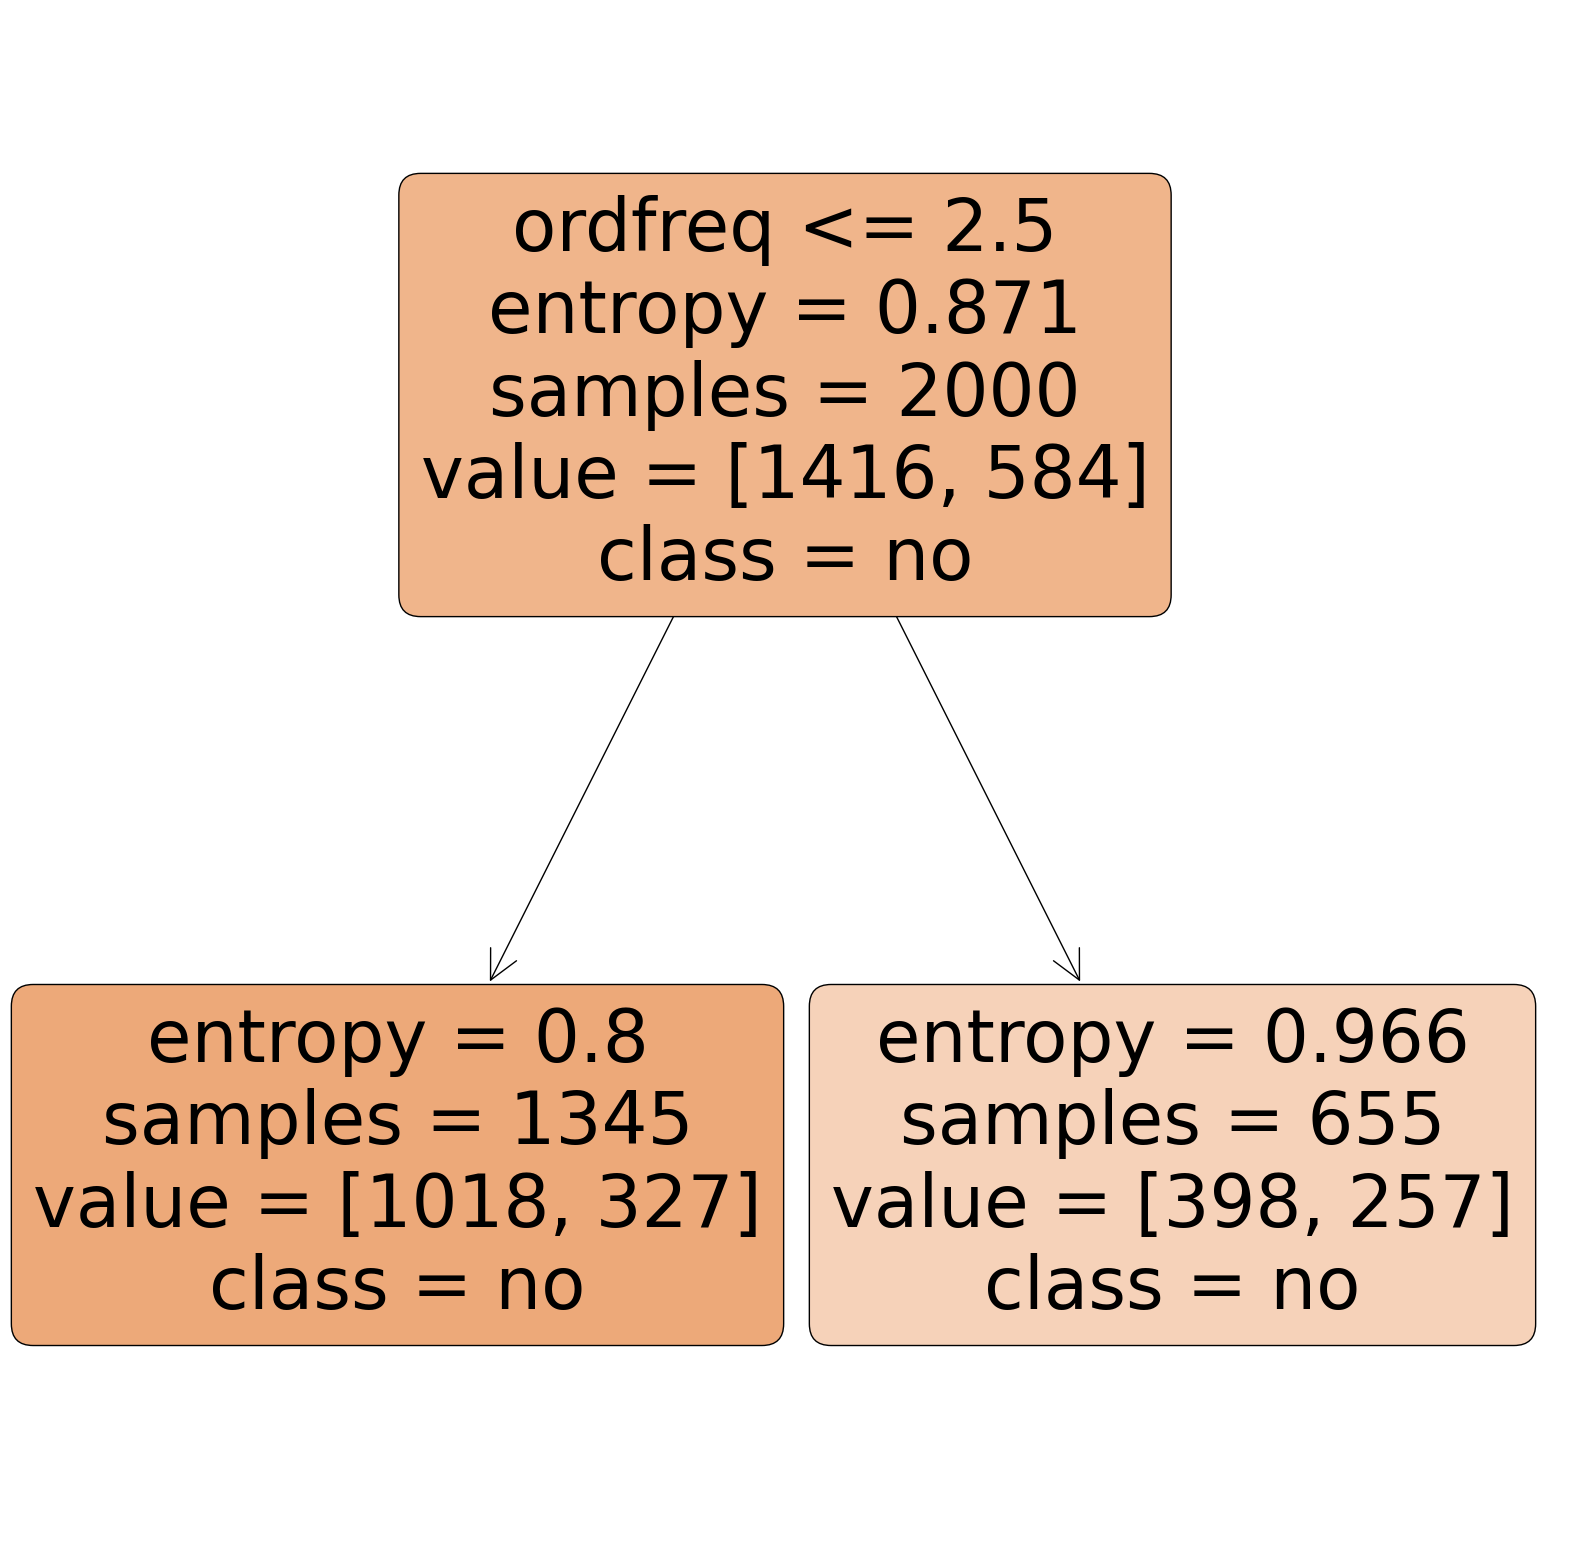

In [35]:
# Plot the decision tree of depth =1
dtree2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
dtree2.fit(X, y)
print('Decision Tree Classifier Created')
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree =dtree2, feature_names = list(dm.columns), class_names = ['no','yes'],filled = True, rounded = True)

In [36]:
# A list of different depths where accuracy of decisison tree was high
l = [1,2,3]
clf_scores={}
# Find Accuracy for Forest classifiers with 100 decion trees. 
for i in l:
    clf = RandomForestClassifier(n_estimators=100,max_depth=i, random_state=0)
    scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    clf_scores[i]=scores.mean()
    print(f'Accuracy for depth {i} random forest classifiers: {clf_scores[i]*100}')

Accuracy for depth 1 random forest classifiers: 70.8
Accuracy for depth 2 random forest classifiers: 70.8
Accuracy for depth 3 random forest classifiers: 71.2


In [37]:
# A list of different depths where accuracy of decison tree was high
l = [1,2,3]
clf_scores={}
# Find Accuracy for Forest classifiers with 50 decision trees.
for i in l:
    clf = RandomForestClassifier(n_estimators=50,max_depth=i, random_state=0)
    scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    clf_scores[i]=scores.mean()
    print(f'Accuracy for depth {i} random forest classifiers: {clf_scores[i]*100}')

Accuracy for depth 1 random forest classifiers: 70.8
Accuracy for depth 2 random forest classifiers: 70.8
Accuracy for depth 3 random forest classifiers: 71.2


In [38]:
# Standardizing data for KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Compute the mean and standard deviation
scaler.fit(X)
# Transform the data by standardizing it
scaled_features = scaler.transform(X)
# Create a dataframe with standardized data
X2 = pd.DataFrame(scaled_features,columns=X.columns)
X2.head()

,elpsdm,ordfreq,ordcat,log10_n24,log10_rev24,log10_revlast
0,2.141979,-0.923902,0.31409,-1.318531,-1.168909,0.323798
1,2.141979,-0.923902,0.31409,1.337988,1.235351,0.323798
2,2.141979,-0.923902,0.31409,-0.354792,-0.484239,0.105939
3,2.141979,-0.923902,0.31409,0.474494,0.390467,0.105939
4,2.141979,-0.923902,0.31409,-1.318531,-1.088575,0.200724


Cross validation average accuracy for k = 5 is 67.35
Cross validation average accuracy for k = 6 is 69.5
Cross validation average accuracy for k = 7 is 68.15
Cross validation average accuracy for k = 8 is 69.7
Cross validation average accuracy for k = 9 is 67.9
Cross validation average accuracy for k = 10 is 70.65


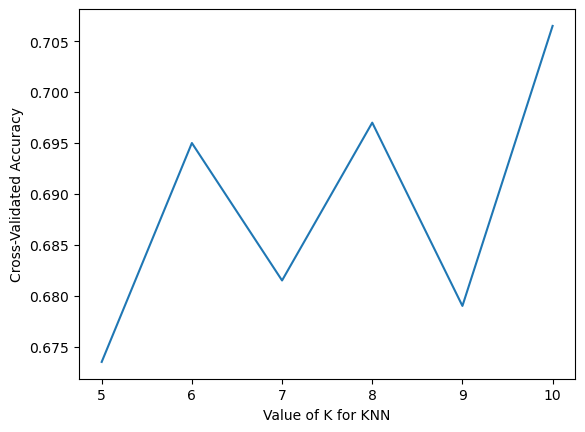

In [39]:
kf =KFold(n_splits=10, shuffle=True, random_state=1)
# We are taking k from 5 to 10
k_range = range(5,11)
# List of scores of different KNN models
k_scores = []
# Find cross validation average accuracy for different values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X2, y, cv=kf, scoring='accuracy')
    k_scores.append(scores.mean())
    print("Cross validation average accuracy for k = {} is {}".format(k,scores.mean()*100))
# Plot the scores of different knn models vs different values of k
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [40]:
kf =KFold(n_splits=10, shuffle=True, random_state=1)
# Build the Logistic Regression model
model = LogisticRegression()
# Find the accuracy of the model using the Kfold cross validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print('Accuracy: %.3f Standard Deviation: (%.3f)' % (scores.mean()*100, scores.std()*100))

Accuracy: 71.150 Standard Deviation: (3.550)


In [41]:
# Adding the intercept
X_with_const = sm.add_constant(X)

# Training the Logistic regression model
logreg2 = sm.Logit(y, X_with_const).fit()

# Printing the summary
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.584178
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1993
Method:                           MLE   Df Model:                            6
Date:                Wed, 20 Mar 2024   Pseudo R-squ.:                 0.03271
Time:                        16:44:21   Log-Likelihood:                -1168.4
converged:                       True   LL-Null:                       -1207.9
Covariance Type:            nonrobust   LLR p-value:                 5.695e-15
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6215      0.596      1.042      0.297      -0.547       1.791
elpsdm           -0.

## We are running 10-fold cross validation on Decision Trees, Random Forest and Logistic Regression

In [42]:
# Using the best models identified in each category.on
decision_tree_best = DecisionTreeClassifier(criterion = 'entropy',max_depth=1)
random_forest_best = RandomForestClassifier(n_estimators=50,max_depth=3, random_state=0)
logistic_regression = LogisticRegression()

# Creating a dictionary of models
models_dict = dict()
models_dict['Decision Tree'] = decision_tree_best
models_dict['Random Forest'] = random_forest_best
models_dict['Logistic Regression'] = logistic_regression
kf =KFold(n_splits=10, shuffle=True, random_state=1)
scores_mean = []
model_names = []
for k,model in models_dict.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    scores_mean.append(scores.mean())
    print("Cross validation scores for {} model is {}".format(k,scores.mean()*100))
    model_names.append(k)

Cross validation scores for Decision Tree model is 70.8
Cross validation scores for Random Forest model is 71.2
Cross validation scores for Logistic Regression model is 71.15


## We are running 10-fold cross validation on KNN 


Cross validation scores for KNN model is 70.65


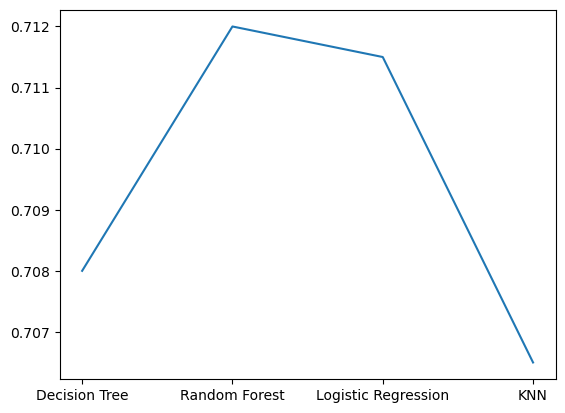

In [43]:
# Since we are using a standardized feature dataset, we will calculate the accuracy score of KNN model separately.
knn_best = KNeighborsClassifier(n_neighbors=10)
models_dict = dict()
models_dict['KNN'] = knn_best
kf =KFold(n_splits=10, shuffle=True, random_state=1)
for k,model in models_dict.items():
    scores = cross_val_score(model, X2, y, cv=kf, scoring='accuracy')
    scores_mean.append(scores.mean())
    print("Cross validation scores for {} model is {}".format(k,scores.mean()*100))
    model_names.append(k)
plt.plot(model_names,scores_mean)
plt.show()

In [44]:
# We recommend using the Random Forest model
final_rec_model = RandomForestClassifier(n_estimators=50,max_depth=3, random_state=0)
# Train the model
final_rec_model.fit(X,y)
print("Output of the random forest classifier on the whole dataset ",final_rec_model.predict(X))
score = cross_val_score(final_rec_model, X, y, cv=kf, scoring='accuracy')
print("Accuracy_score : ",score.mean()*100)

Output of the random forest classifier on the whole dataset  [0 0 0 ... 0 0 0]
Accuracy_score :  71.2


In [45]:
# Read the dmtest.csv file and create a dataframe.
dm2 = pd.read_csv(r'data\dmtest.csv')
dm2['log10_n24'] = np.log(dm2['n24'])
dm2['log10_rev24'] = np.log(dm2['rev24'])
dm2['log10_revlast'] = np.log(dm2['revlast']+0.0000001)
dm2 = dm2.drop(['n24', 'rev24', 'revlast', 'id'], axis =1)
dm2

,elpsdm,ordfreq,ordcat,log10_n24,log10_rev24,log10_revlast
0,24,1,6,1.609438,5.225747,2.890372
1,24,1,6,0.693147,3.401197,2.708050
2,24,1,7,3.178054,5.891644,3.401197
3,24,1,6,1.386294,3.713572,2.708050
4,24,1,6,1.609438,4.077537,2.890372
...,...,...,...,...,...,...
1995,1,1,7,2.197225,5.105945,-16.118096
1996,1,3,6,2.397895,5.003946,2.708050
1997,1,2,5,2.890372,5.081404,2.564949
1998,1,4,7,3.258097,6.056784,3.218876


In [46]:
# Predict the target variable
predictions=final_rec_model.predict(dm2)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
from collections import Counter
# Count the number of predicted zeroes and ones. 
Counter(predictions)

Counter({0: 1998, 1: 2})

In [48]:
# Add the prediction column to the dataset
dm2["prediction"] = predictions
dm2

,elpsdm,ordfreq,ordcat,log10_n24,log10_rev24,log10_revlast,prediction
0,24,1,6,1.609438,5.225747,2.890372,0
1,24,1,6,0.693147,3.401197,2.708050,0
2,24,1,7,3.178054,5.891644,3.401197,0
3,24,1,6,1.386294,3.713572,2.708050,0
4,24,1,6,1.609438,4.077537,2.890372,0
...,...,...,...,...,...,...,...
1995,1,1,7,2.197225,5.105945,-16.118096,0
1996,1,3,6,2.397895,5.003946,2.708050,0
1997,1,2,5,2.890372,5.081404,2.564949,0
1998,1,4,7,3.258097,6.056784,3.218876,0


In [49]:
# Create a csv file from the dataframe
dm2.to_csv('group05dmtest.csv', index=False)
# Read the csv file we created to create a new dataframe
df3=pd.read_csv('group05dmtest.csv')
df3

,elpsdm,ordfreq,ordcat,log10_n24,log10_rev24,log10_revlast,prediction
0,24,1,6,1.609438,5.225747,2.890372,0
1,24,1,6,0.693147,3.401197,2.708050,0
2,24,1,7,3.178054,5.891644,3.401197,0
3,24,1,6,1.386294,3.713572,2.708050,0
4,24,1,6,1.609438,4.077537,2.890372,0
...,...,...,...,...,...,...,...
1995,1,1,7,2.197225,5.105945,-16.118096,0
1996,1,3,6,2.397895,5.003946,2.708050,0
1997,1,2,5,2.890372,5.081404,2.564949,0
1998,1,4,7,3.258097,6.056784,3.218876,0


In [50]:
# Read the dmtrain.csv file and create a dataframe
dm12 = pd.read_csv(r'data\dmtrain.csv')

# Copy the dataframe
lr2=dm12.copy()

# Filter the rows so that time elapsed since last order (in months) is between 13 and 24 i.e lapsing customers.
lr2 = lr2[lr2.elpsdm > 12]

# Drop the id column
lr2.drop(['id'],axis=1,inplace=True)
# Perform log transform on the three columns like before
lr2['log10_n24'] = np.log(lr2['n24'])
lr2['log10_rev24'] = np.log(lr2['rev24'])
lr2['log10_revlast'] = np.log(lr2['revlast']+0.0000001)

# Drop the original variables
lr2 = lr2.drop(['n24', 'rev24', 'revlast'], axis =1)
lr2

,elpsdm,ordfreq,ordcat,response,log10_n24,log10_rev24,log10_revlast
0,24,1,6,1,0.693147,3.401197,2.995732
1,24,1,6,0,3.218876,5.332719,2.995732
2,24,1,6,0,1.609438,3.951244,2.708050
3,24,1,6,0,2.397895,4.653960,2.708050
4,24,1,6,0,0.693147,3.465736,2.833213
...,...,...,...,...,...,...,...
1648,13,1,7,0,1.386294,4.744932,3.555348
1649,13,4,5,0,3.367296,5.117994,1.609438
1650,13,4,4,0,2.564949,3.713572,1.098612
1651,13,4,7,0,1.945910,5.424950,3.688879


In [51]:
# Copy the dataframe
X12 = lr2.copy()
# Get the target and independent variables in separate numpy arrays
X12 = X12.drop(['response'], axis = 1).to_numpy()
y12 = lr2['response'].to_numpy()

# Using the best models identified in each category.on accuracy
decision_tree_best = DecisionTreeClassifier(criterion = 'entropy',max_depth=1)
random_forest_best = RandomForestClassifier(n_estimators=50,max_depth=3, random_state=0)
logistic_regression = LogisticRegression()

# Creating a dictionary of models
models_dict = dict()
models_dict['Decision Tree'] = decision_tree_best
models_dict['Random Forest'] = random_forest_best
models_dict['Logistic Regression'] = logistic_regression
kf =KFold(n_splits=10, shuffle=True, random_state=1)
scores_mean = []
model_names = []
for k,model in models_dict.items():
    scores = cross_val_score(model, X12, y12, cv=kf, scoring='accuracy')
    scores_mean.append(scores.mean())
    print("Cross validation scores for {} model is {}".format(k,scores.mean()*100))
    model_names.append(k)


Cross validation scores for Decision Tree model is 72.28952172325667
Cross validation scores for Random Forest model is 72.47060971157357
Cross validation scores for Logistic Regression model is 72.5918218327857


In [52]:
# Standardizing data for KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Compute the mean and standard deviation
scaler.fit(lr2.drop(['response'], axis = 1))
# Transform the data by standardizing it
scaled_features = scaler.transform(lr2.drop(['response'], axis = 1))
# Create a dataframe with standardized data
X122 = pd.DataFrame(scaled_features,columns=lr2.drop(['response'], axis = 1).columns)
X122.head()

,elpsdm,ordfreq,ordcat,log10_n24,log10_rev24,log10_revlast
0,2.629265,-0.857172,0.262587,-1.250454,-1.137615,0.575196
1,2.629265,-0.857172,0.262587,1.420404,1.344942,0.575196
2,2.629265,-0.857172,0.262587,-0.281513,-0.430648,0.053990
3,2.629265,-0.857172,0.262587,0.552250,0.472544,0.053990
4,2.629265,-0.857172,0.262587,-1.250454,-1.054664,0.280753


Cross validation scores for KNN model is 71.80722891566266


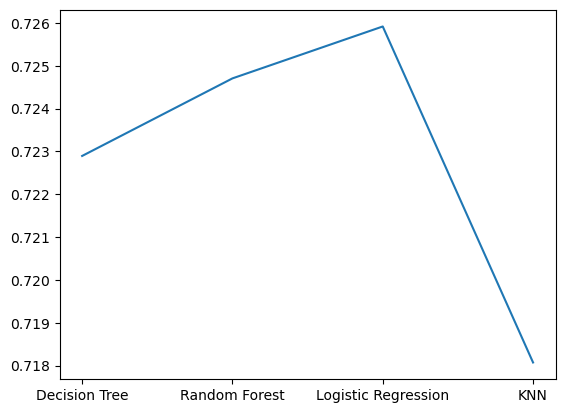

In [53]:
# Since we are using a standardized feature dataset, we will calculate the accuracy score of KNN model separately.
knn_best = KNeighborsClassifier(n_neighbors=10)
models_dict = dict()
models_dict['KNN'] = knn_best
kf =KFold(n_splits=10, shuffle=True, random_state=1)
for k,model in models_dict.items():
    scores = cross_val_score(model, X122, y12, cv=kf, scoring='accuracy')
    scores_mean.append(scores.mean())
    print("Cross validation scores for {} model is {}".format(k,scores.mean()*100))
    model_names.append(k)
plt.plot(model_names,scores_mean)
plt.show()

In [54]:
# Copy the dataframe
lr3=dm12.copy()

# Filter the rows so that time elapsed since last order (in months) is less than 13 i.e non-lapsing customers
lr3= lr3[lr3.elpsdm <=12]
lr3.drop(['id'],axis=1,inplace=True)
lr3['log10_n24'] = np.log(lr3['n24'])
lr3['log10_rev24'] = np.log(lr3['rev24'])
lr3['log10_revlast'] = np.log(lr3['revlast']+0.0000001)
lr3= lr3.drop(['n24', 'rev24', 'revlast'], axis =1)
lr3

,elpsdm,ordfreq,ordcat,response,log10_n24,log10_rev24,log10_revlast
1653,12,1,6,1,0.000000,2.995732,2.995732
1654,12,4,4,1,2.484907,4.127134,1.098612
1655,12,4,6,1,2.833213,5.501258,2.995732
1656,12,2,7,1,1.945910,5.187386,3.367296
1657,12,4,5,1,1.609438,3.178054,1.098612
...,...,...,...,...,...,...,...
1995,1,2,6,0,2.484907,4.653960,2.995732
1996,1,2,6,0,3.583519,6.666957,1.609438
1997,1,1,7,0,1.945910,6.028279,4.605170
1998,1,1,7,0,1.609438,4.343805,3.218876


In [55]:
# Copy the dataframe
X12_others = lr3.copy()
# Get the target and independent variables in separate numpy arrays
X12_others = X12_others.drop(['response'], axis = 1).to_numpy()
y12_others = lr3['response'].to_numpy()

# Create a Logistic Regression model
LR_others = LogisticRegression(random_state=1)
# Fit the model.
LR_others.fit(X12_others, y12_others)
# Get the accuracy of the logisitic regression model
score = cross_val_score(LR_others, X12_others, y12_others, cv=kf, scoring='accuracy')
print("Accuracy_score of Logistic Regression when working with non lapsing customers: ",score.mean()*100)

Accuracy_score of Logistic Regression when working with non lapsing customers:  62.22689075630251
